# Logistic Regression

In [1]:
from math import exp
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

Your first task is to complete the function `gen_logistic` in the following cell so as to be able to generate the logistic function for a given input. The logistic function is a type of <em>sigmoid</em> function which has an 'S'-shape and 'squashes' its inputs to a value lying in the range [0,1]. Other sigmoid functions include the hyperbolic-tangent funcition (`tanh(x)`) and the error function (`erf(x)`). https://en.wikipedia.org/wiki/Sigmoid_function.
Calculate sigmoid using the below formulas.

$$\sigma(z) = \dfrac{1}{1+e^{-z}}$$
$$z^{(i)} = \bm{W \cdot X} +b$$

In [2]:
def gen_logistic(x, w=1, b=0):
    """
    outputing the logistic output for an input x
    :param x: scalar or numpy array of shape (n_samples, n_features). If only one feature, it must have the shape of (n_samples,1).
    :param w: weight(s); either scalar or numpy array of shape (1, n_features)
    :param b: bias; either scalar or numpy array of shape (1,)
    returns y of shape (n_samples,)
    """    
    # TODO: Finish this function to return the output of applying the sigmoid
    # function to the input x (Please do not use external libraries) store 
    # the output in y and return y. Do not change the default parameter values.
    # Hint: This function will be used in any input shape scalar (0d), 1d vector, and 2d arrays. Please make sure it can handle all those. Following reshaping codes might help.
    # Hint2: You may use design matrix using concatenation, but it is not necesary.
    
    
    if np.isscalar(x):
      x = np.array(x).reshape((1,1))
    if np.isscalar(w):
      w = np.array(w).reshape((1,1))
    if np.isscalar(b):
      b = np.array(b).reshape((1,1))  
    if b.shape==(1,):
      b= b.reshape((1,1))  
    
    z = w*x + b
    
    y = 1/(1 + np.exp(-z))
    
    print(y.reshape(y.shape[0],))
    return y.reshape(y.shape[0],)

In [3]:
import pytest
assert pytest.approx(gen_logistic(np.array([[2],[0.2],[17]])),0.001) == np.array([0.88079708, 0.549834, 0.99999996]), "Check the gen_logistic function."

[0.88079708 0.549834   0.99999996]


Generate a vector x of length N with values lying between limits Xa and Xb (for this you will have to choose your own limits; play around with different values) and apply the gen_logistic function to this vector. Proceed to plot the output and verify the shape of the output. If your decision boundary value is about the center of your x range, you will see an S-shape. Complete the Peer Review section for this section.

[1.67014218e-05 4.78511085e-05 1.37089859e-04 3.92686872e-04
 1.12429556e-03 3.21456944e-03 9.15543007e-03 2.57915356e-02
 7.05056835e-02 1.78533369e-01 3.83744612e-01 6.40825160e-01
 8.36385824e-01 9.36088489e-01 9.76725382e-01 9.91751766e-01
 9.97105676e-01 9.98987922e-01 9.99646534e-01 9.99876605e-01]


Text(0.5, 1.0, 'Logistic/Sigmoid Function')

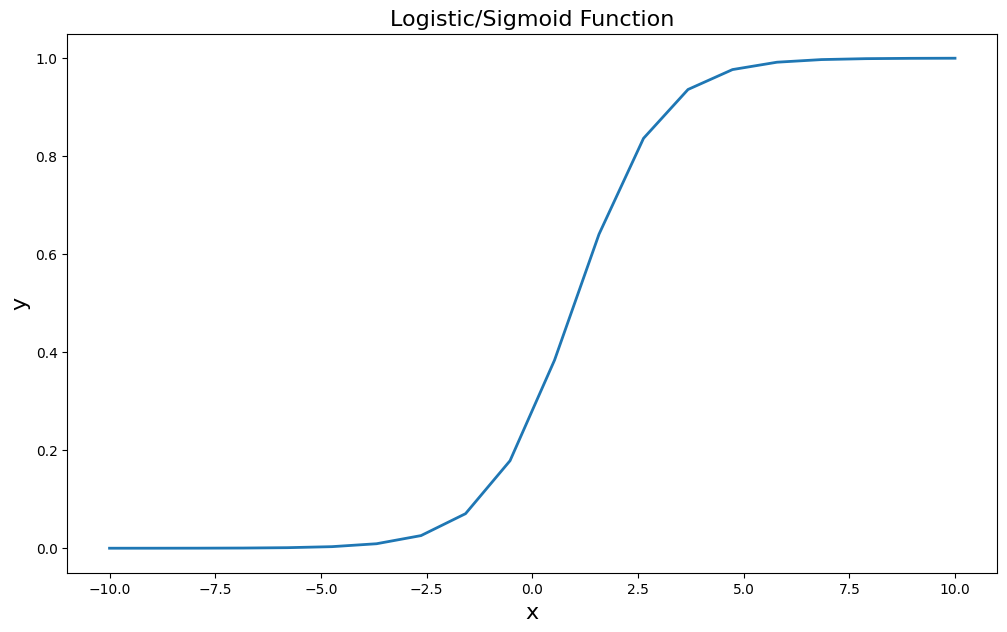

In [6]:
N = 20
Xa = -10
Xb = 10
w = 1
b = -1

x = np.expand_dims(np.linspace(Xa,Xb,N), axis=1)
y = gen_logistic(x, w, b)

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,7))
ax.plot(x,y, lw=2)
ax.set_xlabel("x", fontsize=16)
ax.set_ylabel("y", fontsize=16)
ax.set_title("Logistic/Sigmoid Function", fontsize=16)

***1. Increasing w will make the curve transition sharply: [True/False]***

In [5]:
sharp_transition = 'True'

***2. If b increases by 1, then the decision boundary x decreases by 1: [True/False]***

In [7]:
x_decreases_by_1 = 'False'

Performing binary classification using logistic regression on the breast-cancer dataset. In this part you will be exposed to different methods within the scikit-learn LogisticRegression class so you can build a classifier.

In [16]:
# Importing the breast-cancer dataset from sklearn datasets

class BC_data:
    """
    class to import the breast cancer dataset from sklearn
    
    """
    def __init__(self):
        
        x, y = load_breast_cancer(return_X_y= True)
        X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state= 5)
        self.x_train = X_train 
        self.x_test = X_test
        self.y_train = y_train 
        self.y_test = y_test
        
        # TODO: Split the data into training and test data (use train_test_split sklearn) 
        # such that the test data size is 25% of total number of observations
        # No need to rescale the data. Use the data as is.
        # Use random_state = 5
        
        
data = BC_data()

**Build and Fit Logistic Regression Model**

In [20]:
LogReg = LogisticRegression(solver="liblinear").fit(X= data.x_train,y = data.y_train)
LogReg.coef_

array([[ 1.89038896e+00,  1.44257903e-01, -9.89409947e-02,
        -1.05647611e-03, -1.35380881e-01, -3.30535162e-01,
        -5.77087797e-01, -3.16468410e-01, -1.83377189e-01,
        -1.23116151e-02,  4.00766065e-02,  1.62223912e+00,
         1.16247932e-01, -9.78890370e-02, -1.76864906e-02,
         2.66271163e-02, -4.95304414e-02, -3.75449037e-02,
        -2.78535535e-02,  8.50077686e-03,  1.51681488e+00,
        -4.03270840e-01, -1.05906252e-01, -2.52491142e-02,
        -2.56986381e-01, -8.29175931e-01, -1.37990538e+00,
        -5.82245999e-01, -5.70040298e-01, -8.29516126e-02]])

In the next cell, compute the ROC curve and the area under the curve and plot the ROC curve. 

Hint: sklearn.metrics has a function to calculate area under the curve. 

[0.         0.03636364 1.        ] [0.         0.98863636 1.        ]
auc:0.9761363636363637


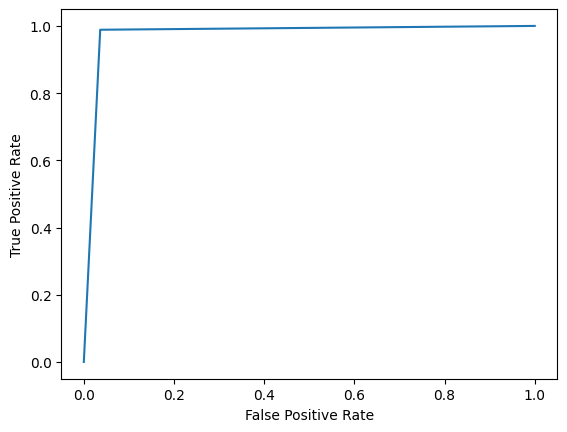

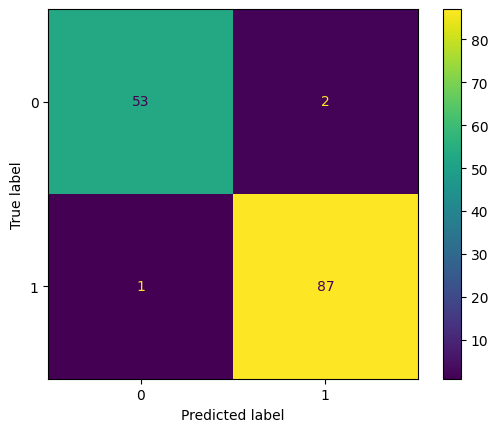

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, RocCurveDisplay
y_pred = LogReg.predict(data.x_test)
fpr, tpr, thresholds  =roc_curve(data.y_test,y_pred)
print(fpr,tpr)
auc = roc_auc_score(data.y_test,y_pred)
print("auc:{}".format(auc))
RocCurveDisplay(fpr = fpr, tpr = tpr).plot()
ConfusionMatrixDisplay(confusion_matrix=(confusion_matrix(data.y_test,y_pred))).plot()

Text(0, 0.5, 'True positive rate')

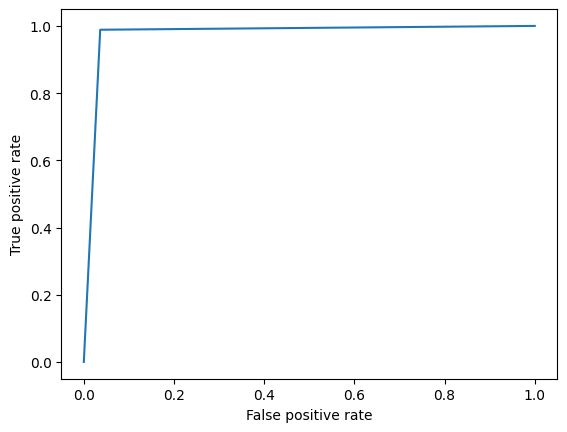

In [33]:
plt.plot(fpr,tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

Here we will use the trained model coefficients and generate the `classification probabilities` using the `gen_logistic` function we built. The goal of this section is to make you understand how logistic regression classifies data points during and after training. Using the predictions from the generated probabilities, you will compute the precision and recall metrics (defined below).

In [52]:
from functools import reduce
def calculate_precision(y_true, y_pred, pos_label_value=1.0):
    '''
    This function accepts the labels and the predictions, then
    calculates precision for a binary classifier.
    
    Args
        y_true: np.ndarray
        y_pred: np.ndarray
        
        pos_label_value: (float) the number which represents the postiive
        label in the y_true and y_pred arrays. Other numbers will be taken
        to be the non-positive class for the binary classifier.
    
    Returns precision as a floating point number between 0.0 and 1.0
    '''
    
    
    # your code here
    y_pair = zip(y_true,y_pred)
    
    a = reduce(lambda x,i: x + (1 if i[0] == i[1] and i[0] == pos_label_value else 0),y_pair,0)
    print(a)
    
    return 0.0

def calculate_recall(y_true, y_pred, pos_label_value=1.0):
    '''
    This function accepts the labels and the predictions, then
    calculates recall for a binary classifier.
    
    Args
        y_true: np.ndarray
        y_pred: np.ndarray
        
        pos_label_value: (float) the number which represents the postiive
        label in the y_true and y_pred arrays. Other numbers will be taken
        to be the non-positive class for the binary classifier.
    
    Returns precision as a floating point number between 0.0 and 1.0
    '''
    
    # your code here
    
    
    return 0.0
y = [1, 1,0]
y2 = [1,1,1]
calculate_precision(y,y2)

2


0.0